In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pickle
from matplotlib import pyplot as plt

In [2]:
origin_df  = pd.read_csv('area_price.csv')
df = origin_df.copy() 
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


# Create dummies columns

In [3]:
dummies = pd.get_dummies(df.town)

In [4]:
merged_df = pd.concat([df, dummies], axis='columns')
merged_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [5]:
final= merged_df.drop(['west windsor','town'],axis=1)
final.area =final.area / final.area.max()
final

,area,price,monroe township,robinsville
0,0.650,550000,1,0
1,0.750,565000,1,0
2,0.800,610000,1,0
3,0.900,680000,1,0
4,1.000,725000,1,0
5,0.650,585000,0,0
6,0.700,615000,0,0
7,0.825,650000,0,0
8,0.900,710000,0,0
9,0.650,575000,0,1


In [6]:
X = final.drop(['price'],axis=1)


In [7]:
Y=final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [8]:
model = LinearRegression()

In [9]:
final.head()

,area,price,monroe township,robinsville
0,0.65,550000,1,0
1,0.75,565000,1,0
2,0.80,610000,1,0
3,0.90,680000,1,0
4,1.00,725000,1,0


In [10]:
model.fit(X,Y)

LinearRegression()

In [11]:
predictor = model.predict([[0.75,1,0]])
predictor

array([590468.71640507])

In [12]:
model.score(X,Y)

0.9573929037221874

In [13]:
pickle.dump(model, open('deployment/area_price_model.pkl','wb'))

# One- hot - encoder

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()

In [16]:
df_e = df.copy()
encoded = le.fit_transform(df_e.town)
encoded

array([0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1])

In [17]:
df_e.town = encoded
df_e

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [18]:
new_x = df_e.drop(['price'],axis= 'columns')

In [19]:
area = df_e.area
price = df_e.price

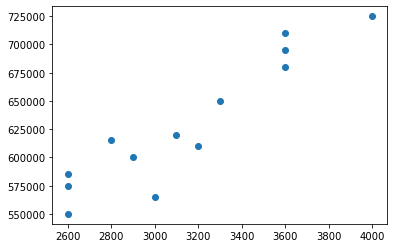

In [20]:
plt.scatter(area, price)

In [21]:
new_x

,town,area
0,0,2600
1,0,3000
2,0,3200
3,0,3600
4,0,4000
5,2,2600
6,2,2800
7,2,3300
8,2,3600
9,1,2600


In [22]:
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [23]:
emodel = LinearRegression()
emodel.fit(new_x,Y)

LinearRegression()

In [24]:
emodel.predict([[1,3600]])

array([687987.34361362])

In [25]:
emodel.predict([[0,4000]])

array([718296.47948793])